<span style="color:lightblue">   <font size = "10"> **QTM151 Final Group Project**

<span style="color:white"> <font size = "5"> Class 1480 - Section 4

<span style="color:white"> <font size = "5"> Group Members: Rohan Patel, John Jaquez, Jairo Polanco

<span style="color:red"><font size = 20> Introduction:


<span style="color:lightsalmon"><font size = 5> Formula 1, or more commonly known as F1, is the most competitive car race in the world.  It is comprised of smaller races (Prix) around the globe that are hosted to determine a winner.  There are three parts to each Prix, the first being a practice day, where drivers get to test their car on the track.  The next day, drivers race by themselves in order to determine their starting position in the race.  And finally, on the third and final day is the race.  During the race, drivers are allowed a pit stop to change their tires and add fuel, but this could come to harm them as it does add time.  On the final lap, the first driver to cross the finish line wins the race.
In this project, we aim to answer the following question: Do location and country play a significant role on a driver's status ?  This question is relevant as after watching the video, I learned that there are different Prix around the world, in different countries with different weather and climate.  With this, I'd like to see if the location and to what extent it plays a role on the status of a driver.  More importantly, I'd like to see if a specific location has more harmful status (i.e. damage, accidents, injury, etc.).  This is relevant as it could be used to determine whether certain locations are no longer safe and need to be modified or just have the Prix in a different location.

<span style="color:red"><font size = 20> Data Description:


In [246]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

circuits    = pd.read_csv ( "data_raw/circuits.csv" )
races       = pd.read_csv ( "data_raw/races.csv" )
results     = pd.read_csv ( "data_raw/results.csv" )
status      = pd.read_csv ( "data_raw/status.csv" )


In [247]:

display ( circuits.dtypes ) 
display ( circuits.iloc[ 0:, ] ) 
len ( pd.unique ( circuits [ "name" ] ) )


circuitId       int64
circuitRef     object
name           object
location       object
country        object
lat           float64
lng           float64
alt            object
url            object
dtype: object

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


77


<span style="color:lightsalmon"><font size = 5>      I will be using the circuits, races, results, and status datasets.  In the circuits dataset, there are 77 rows (observations), each representing a different circuit ( race location ).  There is no reference of time ( years ) in this dataset.  The columns are "circuitId" which contains a unique reference number to each circuit, "circuitRef" which is a string character given to each circuit meant to distinguish them among the others, "name" is the actual name of the circuit track, "location" is the name of the city of the race, "county" is the country in which the race is held, "lat" and "lng" are the latitudinal and longitudinal coordinates of the location of each circuit, "alt" is the altitude in meters, and "url" is the wikipedia page for that specific circuit.  In summary, the data here is the specific location of each circuit with unique identifiers for each individual circuit.


In [248]:

display ( results.dtypes ) 
display ( results.iloc [ 0:, ] )
len ( pd.unique ( results [ "driverId" ] ) )


resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


855


<span style="color:lightsalmon"><font size = 5>      In the results dataset, there are 25840 rows (observations), each representing a result for the different drivers.  There is no reference of time ( years ) in this dataset.  The columns are "circuitId" which contains a unique reference number to each circuit, "circuitRef" which is a string character given to each circuit meant to distinguish them among the others, "name" is the actual name of the circuit track, "location" is the name of the city of the race, "county" is the country in which the race is held, "lat" and "lng" are the latitudinal and longitudinal coordinates of the location of each circuit, "alt" is the altitude in meters, and "url" is the wikipedia page for that specific circuit.  In summary, the data here is the specific location of each circuit with unique identifiers for each individual circuit.


In [249]:

display ( races.dtypes ) 
display ( races.iloc[ 0:, ] ) 


raceId          int64
year            int64
round           int64
circuitId       int64
name           object
date           object
time           object
url            object
fp1_date       object
fp1_time       object
fp2_date       object
fp2_time       object
fp3_date       object
fp3_time       object
quali_date     object
quali_time     object
sprint_date    object
sprint_time    object
dtype: object

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [250]:
 
display ( status.dtypes )
display ( status.iloc[ 0:, ] )

len(pd.unique(status["status"]))


statusId     int64
status      object
dtype: object

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


139


<span style="color:orange"><font size = 5>      I will be using the circuits, races, results, and status datasets.  In the circuits dataset, there are 77 rows (observations), each representing a different circuit ( race location ).  There is no reference of time ( years ) in this dataset.  The columns are 


In [279]:

query1 = status.query ( "status == 'Accident'" ) 
query2 = status.query ( "status == 'Collision'" ) 
query3 = status.query ( "status == 'Spun off'" ) 
query4 = status.query ( "status == 'Puncture'" ) 
query5 = status.query ( "status == 'Broken wing'" ) 
query6 = status.query ( "status == 'Heat shield fire'" ) 
query7 = status.query ( "status == 'Engine fire'" ) 
query8 = status.query ( "status == 'Fire'" ) 
query9 = status.query ( "status == 'Injured'" ) 
query10 = status.query ( "status == 'Injury'" ) 
query11 = status.query ( "status == 'Fuel leak'" ) 
query12 = status.query ( "status == 'Driver unwell'" ) 
query13 = status.query ( "status == 'Fatal accident'" ) 
query14 = status.query ( "status == 'Eye injury'" ) 
query15 = status.query ( "status == 'Collision damage'" ) 
query16 = status.query ( "status == 'Damage'" ) 


In [293]:

bad_status = pd.concat([query1, query2, query3, query4, query5, query6, query7, query8, query9, 
                        query10, query11, query12, query13, query14, query15, query16], axis=0)



In [281]:

# merging

status_merge = pd.merge ( results [ [ "raceId", "driverId", "position", "points", "statusId"]] ,
                       bad_status,
                       on   = "statusId" ,
                       how  = "left" )



In [282]:

circuits_races_merge = pd.merge(    circuits [ [ "circuitId", "location", "country" ] ] ,
                                    races [ [ "raceId", "circuitId", "date", "time", "year"] ],
                                    on = "circuitId",
                                    how = "left" )


In [283]:
merge_rohan = merge = pd.merge ( circuits_races_merge,
                    status_merge,
                    on = "raceId",
                    how = "left")

In [285]:
agg_stats = (merge_rohan.query("year > 2000")
            .groupby("location")
            .agg(count = ("status",len))
            .sort_values(by = "count", ascending = True))


<BarContainer object of 38 artists>

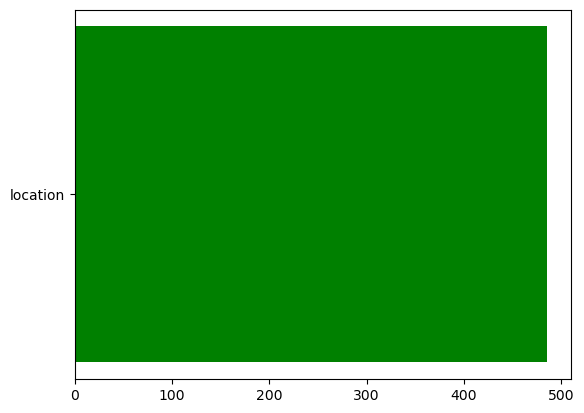

In [290]:

final_agg_stats = agg_stats.query("count >= 1")
final_agg_stats_sorted = final_agg_stats.sort_values("count",ascending=True)


plt.barh(data=final_agg_stats_sorted,y="location",width="count",color="green")